In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/Potato-Leaf',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2226 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Early Blight', 'Healthy', 'Late Blight']

In [ ]:
len(dataset)

70

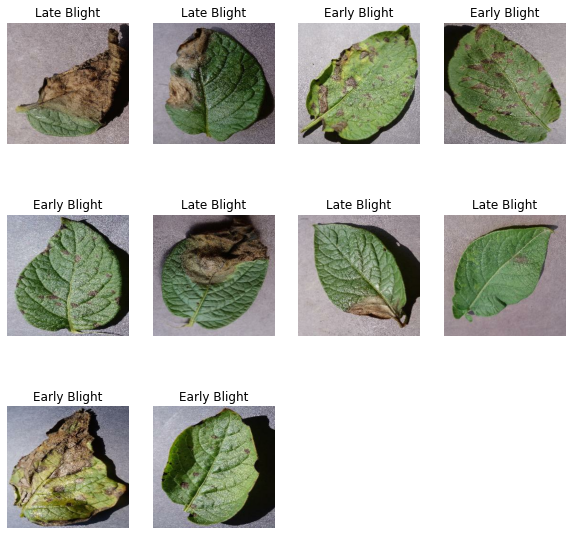

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(0,10):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset) * train_size

56.0

In [ ]:
training_data = dataset.take(54) # 80%
testing_data = dataset.skip(54)
validation_data = testing_data.take(6) # 10%
testing_data = testing_data.skip(6) # 10%

In [ ]:
train_data = training_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_data,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=valid_data
)

Epoch 1/50
54/54 [==============================] - 137s 363ms/step - loss: 0.8785 - accuracy: 0.5104 - val_loss: 0.8607 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 3s 62ms/step - loss: 0.6682 - accuracy: 0.6933 - val_loss: 0.4132 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - 3s 61ms/step - loss: 0.4738 - accuracy: 0.7853 - val_loss: 0.3717 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 3s 62ms/step - loss: 0.5537 - accuracy: 0.7726 - val_loss: 0.5222 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 3s 60ms/step - loss: 0.4693 - accuracy: 0.8252 - val_loss: 0.5303 - val_accuracy: 0.7865
Epoch 6/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2769 - accuracy: 0.8825 - val_loss: 0.2662 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2350 - accuracy: 0.9045 - val_loss: 0.1835 - val_accuracy: 0.9167
Epoch 8/50

In [ ]:
model.evaluate(test_data)

10/10 [==============================] - 8s 60ms/step - loss: 0.0578 - accuracy: 0.9869


[0.05777078494429588, 0.9869281053543091]

The Image Title :  Early Blight
Model Predicted label :  Early Blight


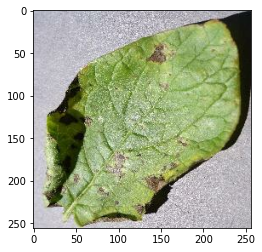

In [ ]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])